## Sklearn Regression 
There are two types of supervised machine learning algorithms: `Regression` and `classification`. In last section we talked about `classification` The former predicts discrete outputs  while the latter predicts continuous value outputs . For instance, predicting the price of a house in dollars is a regression problem whereas predicting whether a tumor is malignant or benign is a classification problem.

### Linear Regression Theory
The term `linearity` in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.</br>
Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.</br>
<img src="1-weGmaJTZewji5_9H2TZetA.png"></br>
***Y= mx + b***</br>
Where b is the intercept and m is the slope of the line. So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The y and x variables remain the same, since they are the data features and cannot be changed. The values that we can control are the intercept(b) and slope(m). There can be multiple straight lines depending upon the values of intercept and slope. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.</br>
<img src="1-fX95txC9xSwSPeP6ch2nmg.gif"></br>



### "Diabetes" Dataset from Scikit Learn
Scikit learn comes with some standard datasets, one of which is the 'diabetes' dataset. In this dataset, ten baseline variables(features), age, sex, body mass index, average blood pressure, and six blood serum measurements(s1, s2, s3, s4, s5 and s6) were obtained for each of 442 diabetes patients, along with response of interest, a quantitative measure of disease progression (y) one year after baseline.


This dataset represents a classic regression problem, where the challenge is to model response y based on the ten features. This model can then be used for two purposes:

* one, to identify the important features (out of the ten mentioned above) that contribute to disease progression
* and two, to predict the response for future patients based on the features



In [11]:
import numpy as np
import pandas as pd
from sklearn import datasets 
diabetes = datasets.load_diabetes()
diabetes


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

### Data Preprocessing
The "diabetes" object belongs to the class Bunch, i.e. it is a collection of various objects bunched together in a dictionary-like format.
These objects include the feature matrix "data" and the target vector "target". We will now create a pandas dataframe containing all the ten features and the response variable (diab_measure) using the following commands:


In [15]:
df = pd.DataFrame(diabetes.data)
df.columns= diabetes.feature_names
df['diabetes measure'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes measure
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [16]:
# Creating the feature matrix X
X=df.iloc[:,:-1]
# Creating the response vector y
y=df.iloc[:,-1]



Scikit learn provides a varied list of scoring metrics to evaluate models. As we will be comparing linear regression models today, the 'neg_mean_squared_error' is the most suited for us. The general convention followed by all the metrics in scikit learn is that higher return values are better than lower return values.

Thus metrics which measure the distance between the predicted model values and the actual data values(like metrics.mean_squared_error) are available as neg_mean_squared_error. So, for example, a model with -100 neg_mean_squared_error is better than the one having -150 neg_mean_squared_error.


### Simple Linear Regression
The simplest form of linear regression is where there is only one feature of a predictor variable/feature. We often hear that a healthy BMI (Body Mass Index) ratio is conducive to a lower chance of developing a diabetic condition.
We can quantify this relation using a simple linear regression model. But first, we need to fetch and save the feature 'BMI' and the response variable 'diabetes_measure' in a form that can be used in scikit learn as follows:


In [27]:
# Choosing 'bmi' as the only feature from the feature matrix X and reshaping the array to 2 dimensions
bmi = X.iloc[:,2]
print(bmi.shape)
bmi=bmi[:,np.newaxis]
print(bmi.shape)
# Choosing 'diabetes_measure' as the response variable and reshaping the array to 2 dimensions
y= df.iloc[:,-1]
y=y[:,np.newaxis]

(442,)
(442, 1)


The steps to building a machine learning model pretty much remain the same as discussed in the previous session on classification models. Let us build a simple linear regression model to quantify the relationship between BMI and diabetes, based on the data we have:

In [30]:
# importing the LinearRegression class from linear_model submodule of scikit learn
from sklearn.linear_model import LinearRegression
# instantiating
simple_lr = LinearRegression()
# Fitting the simple_lr object to the data
simple_lr = LinearRegression().fit(bmi,y)
# predicting the response values and saving them in an object called predicted_y
predicted_y = simple_lr.predict(bmi)

The object 'predicted_y' contains all the response values predicted by our model 'simple_lr'.
Let us now plot the regression line for our model to get a visual representation:


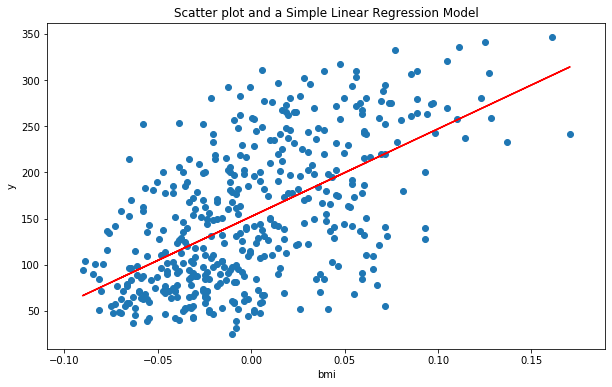

In [35]:
import matplotlib.pylab as plt
%matplotlib inline
# plotting the regression line on the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(bmi, y)
plt.plot(bmi, predicted_y, c='r')
plt.title('Scatter plot and a Simple Linear Regression Model')
plt.ylabel("y")
plt.xlabel("bmi")
plt.show()

In the above plot, the blue dots are the actual data points (x,y). Visually, there seems to be a positive linear relationship between BMI(Body mass index) and the diabetes measure(y), that our model (red line) is trying to capture. But how good is it in doing so?


</br>
The 'cross_val_score' function from the model_selection submodule of scikit learn, takes in an estimator(model) object, a feature matrix, a response vector, a scoring mechanism ('neg_mean_squared_error' in our case) and cv as parameters.
Setting a value of cv to 10, means 10-fold cross-validation will be performed on the given data using the given estimator and corresponding ten 'neg_mean_squared_errors' scores will be generated.
We will simply use the mean of all these ten scores (mse) as an indicator of how good the model is.

In [36]:
# Importing cross_val_score function from the model_selection submodule of scikit learn
from sklearn.model_selection import cross_val_score
# storing the ten scores in an object called mse
mse= cross_val_score(simple_lr,bmi,y,scoring='neg_mean_squared_error',cv=10)
# taking the mean of mse for using as an indicator of how good the model is
mse.mean()

-3906.91899010684